This is a test of a function which ratio of dynamic to innovative process contributions to Kalman filter. I'm testing it on a linear Gaussian process with no noise.s

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')
from glds import glds
from scipy.linalg import expm
%aimport evaluate_all_datasets
from evaluate_all_datasets import kalman_ratio
import numpy as np

d_latent = 2
d_obs = 100
model = glds(d_obs, d_latent)

A = expm(np.array([[-0.625, -20.5], [12.5,-0.625]])*.01)
C,_ = np.linalg.qr(np.random.randn(d_obs, d_latent))
Q = np.eye(d_latent) * .0000000001
R = np.eye(d_obs) * .0000000001
model.set_params(A, C, Q, R)

x0 = np.ones(2) * 10
x, obs = model.simulate(x0, n_steps=1000)

r = kalman_ratio(obs, (A,C,Q,R))

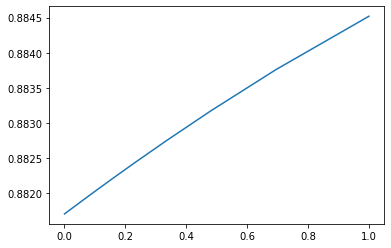

In [2]:
from lds_regression import *
import matplotlib.pyplot as plt

s,r,f,W = simulate_system(100, d_obs, T=1)

ratio=[]
A = expm(np.array([[-0.625, -20.5],[12.5,-0.625]])*.08)
smoothed, b = smooth_spikes(s, .001, .1, .1)
Q = np.eye(d_latent) * .0000000001
sig_range = np.logspace(np.log10(.001),np.log10(1), 20)
for sigma in sig_range:
    R = np.eye(d_obs) * sigma
    ratio.append(kalman_ratio(b[0], (A, W, Q, R)))

plt.plot(sig_range, ratio)

In [ ]:
pca = PCA(n_components=2)
pca.fit(np.concatenate(r[:20]))
A = np.array([[-0.625, -20.5],[12.5,-0.625]])
p,a = one_step_variance_explained(smoothed, A, pca, .08)
np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten())

In [3]:
A,pca = fit_system(smoothed, 2, .1)
p,a = one_step_diff_explained(smoothed, A, pca, 0.1)
np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten())

array([[1.        , 0.31513771],
       [0.31513771, 1.        ]])

In [ ]:
print(np.linalg.eigvals(A))
print(np.linalg.eigvals(np.array([[-0.625, -20.5],[12.5,-0.625]])))

In [4]:
smoothed, b = smooth_spikes(s, .001, .08, .08)
A,pca = fit_system(smoothed, 2, .1)
p,a = one_step_diff_explained(smoothed, A, pca, 0.1)
print(np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten()))
print(np.linalg.eigvals(A))
print(np.linalg.eigvals(np.array([[-0.625, -20.5],[12.5,-0.625]])))

[[1.         0.48517706]
 [0.48517706 1.        ]]
[-0.70149826+8.09981396j -0.70149826-8.09981396j]
[-0.625+16.00781059j -0.625-16.00781059j]


In [5]:
import sys
sys.path.insert(0, '../src')
from evaluate_all_datasets import center_out_gen_counts
from lds_regression import *

%run ../src/create_xarray

In [6]:
dataset

<xarray.Dataset>
Dimensions:     (neuron: 132, time: 1061, trial: 391, variable: 2)
Coordinates:
  * trial       (trial) int64 0 1 2 3 4 5 6 7 ... 384 385 386 387 388 389 390
  * time        (time) float64 -1.004 -1.002 -1.0 -0.9981 ... 1.112 1.114 1.116
  * neuron      (neuron) int64 0 1 2 3 4 5 6 7 ... 133 134 135 136 137 138 140
  * variable    (variable) int64 0 1
Data variables:
    neural      (trial, time, neuron) float64 0.0 0.0 0.0 0.0 ... nan nan nan
    kinematics  (trial, time, variable) float64 nan nan nan ... -81.8 236.6
    instr       (trial) float64 -1.129 -1.395 -1.415 ... -1.345 -1.441 -1.385
    go          (trial) float64 -0.128 -0.394 -0.414 ... -0.344 -0.44 -0.384
    stmv        (trial) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    endmv       (trial) float64 0.468 0.264 0.596 0.476 ... 0.348 0.894 0.588
Attributes:
    dt:       0.002

In [ ]:
smoothed, b = smooth_spikes_unequal(counts, init_binsize, binsize, std=binsize)

In [14]:
binsize=.05
init_binsize=dataset.time[1]-dataset.time[0]
counts = center_out_gen_counts(dataset)
smoothed, b = smooth_spikes_unequal(counts, init_binsize, binsize, std=binsize)
A,pca = fit_system(smoothed, 10, binsize)
p,a = one_step_variance_explained(smoothed, A, pca, binsize)
np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten())

pca fit
system fit


array([[1.        , 0.69929938],
       [0.69929938, 1.        ]])

In [15]:
np.linalg.eigvals(A)

array([ 0.05672619+3.00819276j,  0.05672619-3.00819276j,
       -0.05961848+1.39099581j, -0.05961848-1.39099581j,
       -0.46987733+0.81951226j, -0.46987733-0.81951226j,
        0.50089716+0.j        , -0.14048096+0.j        ,
       -0.189641  +0.41595807j, -0.189641  -0.41595807j])

In [17]:
p,a = one_step_diff_explained(smoothed, A, pca, binsize)
np.corrcoef(np.concatenate(a).flatten(), np.concatenate(p).flatten())[1,0]

array([[1.        , 0.01158242],
       [0.01158242, 1.        ]])

In [ ]:
binned=dataset.neural
counts=[binned.loc[i, dataset.stmv[i]:dataset.endmv[i], :].values for i in dataset.trial]
len(counts)
smooth_spikes_unequal([counts[0]], .002,.08,.08)[0]